In [1]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

En NLTK, la función word_tokenize() depende del modelo preentrenado punkt, que contiene reglas y patrones para dividir el texto en palabras correctamente. Este paquete no viene por defecto en NLTK, por lo que hay que descargarlo manualmente la primera vez.

In [2]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#### importamos el data set

https://huggingface.co/datasets/huggingartists/metallica

In [4]:
from datasets  import load_dataset
ds = load_dataset("huggingartists/metallica")

In [5]:
one = ds['train'][1]['text']

In [51]:
 ds['train']['text'][:1]

['So close, no matter how far\nCouldnt be much more from the heart\nForever trusting who we are\nAnd nothing else matters\nNever opened myself this way\nLife is ours, we live it our way\nAll these words I dont just say\nAnd nothing else matters\nTrust I seek and I find in you\nEveryday, for us, something new\nOpen mind for a different view\nAnd nothing else matters\nNever cared for what they do\nNever cared for what they know\nBut I know\nSo close, no matter how far\nIt couldnt be much more from the heart\nForever trusting who we are\nAnd nothing else matters\nNever cared for what they do\nNever cared for what they know\nBut I know\nI never opened myself this way\nLife is ours, we live it our way\nAll these words I dont just say\nAnd nothing else matters\nTrust I seek and I find in you\nEveryday, for us, something new\nOpen mind for a different view\nAnd nothing else matters\nNever cared for what they say\nNever cared for games they play\nNever cared for what they do\nNever cared for w

In [6]:
MetallicA = ", ".join( ds['train']['text']) # todas las canciones de metallica del ejeplo en un corpus
MetallicA[:35]

'So close, no matter how far\nCouldnt'

#### Tokenize
En NLTK, la función word_tokenize() depende del modelo preentrenado punkt, que contiene reglas y patrones para dividir el texto en palabras correctamente. Este paquete no viene por defecto en NLTK, por lo que hay que descargarlo manualmente la primera vez.

**Tokenizacion de oraciones**

In [7]:
from nltk.tokenize import sent_tokenize
canciones = sent_tokenize(MetallicA) #cada cancion de metallica es un token

# Mostrar las primeras 5 oraciones
print("\nPrimeras oraciones tokenizadas:\n")
for i, cancion in enumerate(canciones[:5], 1):
    print(f"{i}. {canciones}")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



**La letra de la cancion one no tiene signos de puntuación, por lo que hay que hacerle un preprocesado**

In [22]:
fragmentos = one.split("\n")
oraciones = [sent_tokenize(fragmento) for fragmento in fragmentos]

# Aplanar la lista de listas
one_sent = [oracion for sublist in oraciones for oracion in sublist]

# Mostrar las frases tokenizadas
print(one_sent)

['I cant remember anything', 'Cant tell if this is true or a dream', 'Deep down inside I feel to scream', 'This terrible silence stops me', 'Now that the war is through with me', 'Im waking up, I cannot see', 'That theres not much left of me', 'Nothing is real but pain now', 'Hold my breath as I wish for death', 'Oh please God, wake me', 'Back in the womb its much too real', 'In pumps life that I must feel', 'But cant look forward to reveal', 'Look to the time when Ill live', 'Fed through the tube that sticks in me', 'Just like a wartime novelty', 'Tied to machines that make me be', 'Cut this life off from me', 'Hold my breath as I wish for death', 'Oh please God, wake me', 'Now the world is gone, Im just one', 'Oh, God help me', 'Hold my breath as I wish for death', 'Oh please God, help me', 'Darkness imprisoning me', 'All that I see, absolute horror', 'I cannot live, I cannot die', 'Trapped in myself, body my holding cell', 'Landmine has taken my sight', 'Taken my speech, taken my he

**Tokenizacion de palabras**

In [8]:
tokens = word_tokenize(MetallicA, language='english')
tokens = [word.lower() for word in tokens]
tokens[:15]

['so',
 'close',
 ',',
 'no',
 'matter',
 'how',
 'far',
 'couldnt',
 'be',
 'much',
 'more',
 'from',
 'the',
 'heart',
 'forever']

**Con esto convertimos texto en texto NLTK**

In [9]:
t = Text(tokens)
t

<Text: so close , no matter how far couldnt...>

**La función concordance() en NLTK sirve para buscar palabras dentro de un corpus y mostrar el contexto en el que aparecen.**

In [34]:
t.concordance('life') 

Displaying 25 of 360 matches:
matters never opened myself this way life is ours , we live it our way all the
 know i never opened myself this way life is ours , we live it our way all the
 the womb its much too real in pumps life that i must feel but cant look forwa
to machines that make me be cut this life off from me hold my breath as i wish
my legs taken my soul , left me with life in hell , say your prayers , little 
rawling faster obey your master your life burns faster obey your master , mast
eedlework the way , never you betray life of death becoming clearer pain monop
rawling faster obey your master your life burns faster obey your master , mast
ze , drift on numbered days now your life is out of season i will occupy i wil
rawling faster obey your master your life burns faster obey your master , mast
this bitter man he is throughout his life the same , hes battled constantly th
 never me so i dub thee unforgiven , life , it seems , will fade away drifting
 whom the bell tolls ,

**t.collocations() se usa para encontrar combinaciones frecuentes de palabras en un texto. Estas combinaciones, llamadas colocaciones, son pares o grupos de palabras que aparecen juntas con mayor frecuencia de lo esperado por azar, como "inteligencia artificial" o "aprendizaje profundo".**

In [10]:
t.collocations() 

else matters; nothing else; may roam; never-never land; never cared;
faster obey; shortest straw; bell tolls; dub thee; small town; sun
city; destroy searching; thee unforgiven; thousand deaths; master
master; almost like; tick tick; town girl; enter night; metal militia


**conteo de una palabra concreta**

In [36]:
t.count('god')

90

**lugar de aparicion de la palabra**

In [11]:
t.index('god')

297

**similar busca palabras similares por el xontexto en e que aparece. Requiere de varias apariciones**

In [12]:
t.similar('god')

time when what do pain hand dreams on day have anywhere neck maybe so
how and this way is words


**Palabras mas frecuentes**

In [13]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

t_filtered = [word.lower() for word in t if word.isalnum() and word.lower() not in stop_words]

freq_dist = FreqDist(t_filtered)

# Mostrar las 20 palabras más frecuentes
print("\n**Palabras más comunes en el corpus:**\n")
print(freq_dist.most_common(20))


**Palabras más comunes en el corpus:**

[('im', 873), ('yeah', 869), ('never', 569), ('know', 543), ('dont', 539), ('see', 489), ('like', 479), ('one', 474), ('time', 458), ('take', 381), ('cant', 374), ('life', 360), ('come', 323), ('oh', 317), ('got', 317), ('say', 306), ('way', 299), ('go', 288), ('away', 284), ('man', 282)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


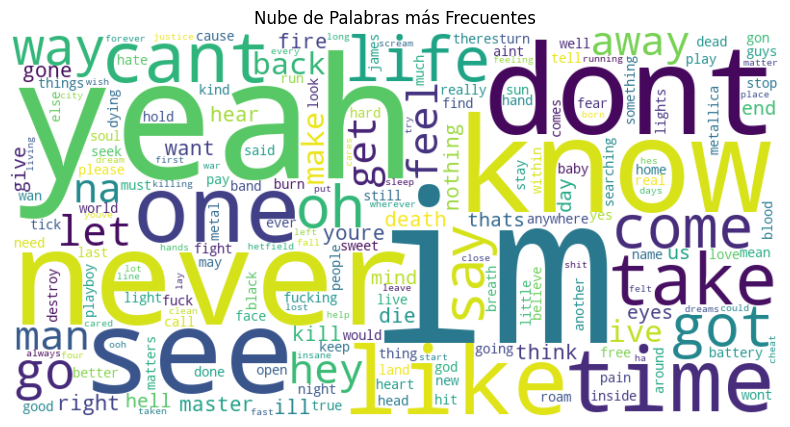

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras más Frecuentes")
plt.show()

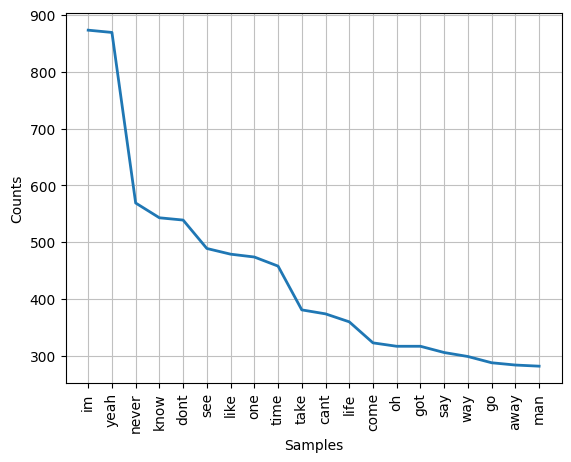

In [15]:
t2=Text(t_filtered).plot(20) # plots 20 most common tokens

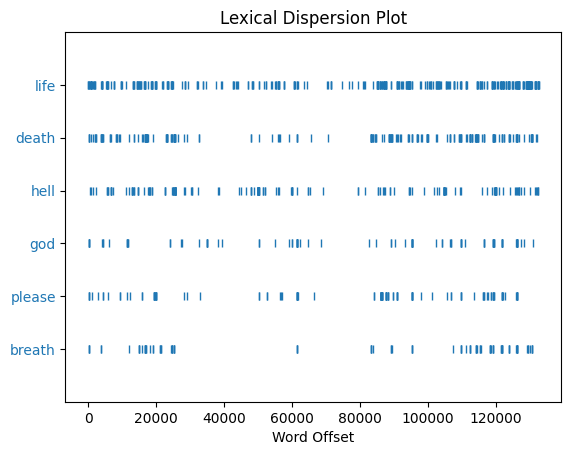

In [16]:
t.dispersion_plot(['life', 'death', 'hell', 'god', 'please', 'breath'])

#### Stemmer

In [17]:
import nltk
from nltk.stem import PorterStemmer

# Inicializar el stemmer
stemmer = PorterStemmer()

# Lista de palabras para aplicar stemming
palabras = ["running", "runner", "runs", "easily", "fairly"]

# Aplicar stemming a cada palabra
palabras_stemmed = [stemmer.stem(word) for word in palabras]

print("\nPalabras originales:", palabras)
print("Palabras después de stemming:", palabras_stemmed)



Palabras originales: ['running', 'runner', 'runs', 'easily', 'fairly']
Palabras después de stemming: ['run', 'runner', 'run', 'easili', 'fairli']


#### Stemmer con snowball en Español

In [48]:
from nltk.stem import (PorterStemmer, LancasterStemmer)
from nltk.stem.snowball import SnowballStemmer # This is "Porter 2" and is considered the optimal stemmer.

# ejemplo de stemmers 

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("spanish")

texto = "El procesamiento de lenguaje natural es fascinante."

tokens1 = word_tokenize(texto, language='spanish')
tokens1 = [word.lower() for word in tokens1]
#tokens1[:15]


tokens1_stemmed = [snowball.stem(word) for word in tokens1]

print("\nPalabras originales:", tokens1)
print("Palabras después de stemming:", tokens1_stemmed)



Palabras originales: ['el', 'procesamiento', 'de', 'lenguaje', 'natural', 'es', 'fascinante', '.']
Palabras después de stemming: ['el', 'proces', 'de', 'lenguaj', 'natural', 'es', 'fascin', '.']


In [24]:
import nltk
from nltk.stem import PorterStemmer

# Inicializar el stemmer
stemmer = PorterStemmer()
one = ds['train'][1]['text']

tokens_one = word_tokenize(one, language='english')
tokens_one = [word.lower() for word in tokens_one]
tokens_one[:15]

t_one= Text(tokens_one)
# Lista de palabras de ejemplo

# Aplicar stemming a cada palabra
palabras_stemmed = [stemmer.stem(word) for word in t_one]

# Unir los resultados en un string tokenizado por espacios
resultado = " ".join(palabras_stemmed)

print(resultado)  # Salida esperada: 


i cant rememb anyth cant tell if thi is true or a dream deep down insid i feel to scream thi terribl silenc stop me now that the war is through with me im wake up , i can not see that there not much left of me noth is real but pain now hold my breath as i wish for death oh pleas god , wake me back in the womb it much too real in pump life that i must feel but cant look forward to reveal look to the time when ill live fed through the tube that stick in me just like a wartim novelti tie to machin that make me be cut thi life off from me hold my breath as i wish for death oh pleas god , wake me now the world is gone , im just one oh , god help me hold my breath as i wish for death oh pleas god , help me dark imprison me all that i see , absolut horror i can not live , i can not die trap in myself , bodi my hold cell landmin ha taken my sight taken my speech , taken my hear taken my arm , taken my leg taken my soul , left me with life in hell


#### Lemmatizer

In [26]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk.stem import WordNetLemmatizer


# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Aplicar lematización a cada palabra
palabras_lemmatized = [lemmatizer.lemmatize(word) for word in t_one]

# Unir los resultados en un string tokenizado por espacios
resultado = " ".join(palabras_lemmatized)

print(resultado)  # Salida con palabras lematizadas


i cant remember anything cant tell if this is true or a dream deep down inside i feel to scream this terrible silence stop me now that the war is through with me im waking up , i can not see that there not much left of me nothing is real but pain now hold my breath a i wish for death oh please god , wake me back in the womb it much too real in pump life that i must feel but cant look forward to reveal look to the time when ill live fed through the tube that stick in me just like a wartime novelty tied to machine that make me be cut this life off from me hold my breath a i wish for death oh please god , wake me now the world is gone , im just one oh , god help me hold my breath a i wish for death oh please god , help me darkness imprisoning me all that i see , absolute horror i can not live , i can not die trapped in myself , body my holding cell landmine ha taken my sight taken my speech , taken my hearing taken my arm , taken my leg taken my soul , left me with life in hell


#### Normalizamos one

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# 1. minusculas

one = ds['train'][1]['text']
one_lower=one.lower()
print("Lowercased one:", one_lower)


# 2. Removing punctuation
one_no_punct = re.sub(r'[^\w\s]', '', one_lower)
print("One without punctuation:", one_no_punct)

# 3. Tokenization
words = nltk.word_tokenize(one_no_punct)
print("Tokenized words:", words)


# 4. Removing stop words
stop_words = set(stopwords.words('english'))
words_no_stop = [word for word in words if word not in stop_words]
print("Text without stopwords:", words_no_stop)

# 5. Stemming
ps = PorterStemmer()
words_stemmed = [ps.stem(word) for word in words_no_stop]
print("Stemmed words:", words_stemmed)

# 6. Lemmatization
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in words_no_stop]
print("Lemmatized words:", words_lemmatized)



Lowercased one: i cant remember anything
cant tell if this is true or a dream
deep down inside i feel to scream
this terrible silence stops me
now that the war is through with me
im waking up, i cannot see
that theres not much left of me
nothing is real but pain now
hold my breath as i wish for death
oh please god, wake me
back in the womb its much too real
in pumps life that i must feel
but cant look forward to reveal
look to the time when ill live
fed through the tube that sticks in me
just like a wartime novelty
tied to machines that make me be
cut this life off from me
hold my breath as i wish for death
oh please god, wake me
now the world is gone, im just one
oh, god help me
hold my breath as i wish for death
oh please god, help me
darkness imprisoning me
all that i see, absolute horror
i cannot live, i cannot die
trapped in myself, body my holding cell
landmine has taken my sight
taken my speech, taken my hearing
taken my arms, taken my legs
taken my soul, left me with life in he

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



**Palabras más comunes en el corpus:**

[('taken', 6), ('oh', 4), ('god', 4), ('cant', 3), ('hold', 3), ('breath', 3), ('wish', 3), ('death', 3), ('please', 3), ('life', 3), ('feel', 2), ('im', 2), ('see', 2), ('much', 2), ('left', 2), ('real', 2), ('wake', 2), ('look', 2), ('live', 2), ('help', 2)]


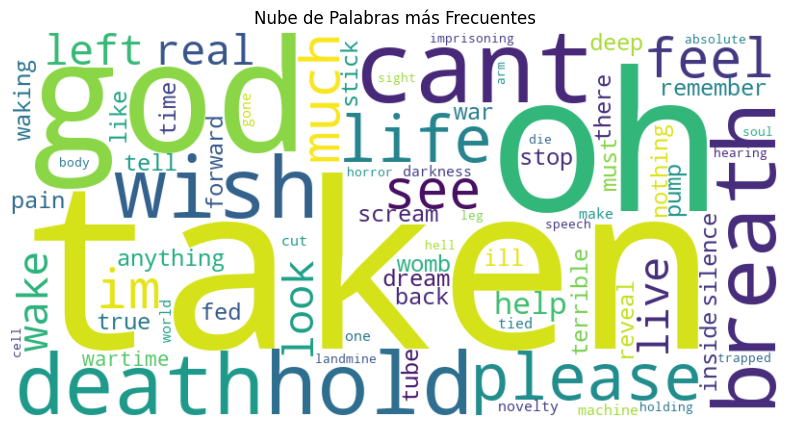

In [33]:
freq_dist = FreqDist(words_lemmatized)

# Mostrar las 20 palabras más frecuentes
print("\n**Palabras más comunes en el corpus:**\n")
print(freq_dist.most_common(20))

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras más Frecuentes")
plt.show()

## POS: Part of Speeech

In [52]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import cess_esp

# Descargar corpus en español
nltk.download("cess_esp")
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger_eng')

# Texto de ejemplo
texto = "I love learning algebra"

# Tokenizar el texto
tokens = word_tokenize(texto, language="english")

# Obtener etiquetas POS desde el corpus CESS-ESP
tagged_words = nltk.pos_tag(tokens, lang="eng")

print(tagged_words)


[('I', 'PRP'), ('love', 'VBP'), ('learning', 'VBG'), ('algebra', 'NN')]


[nltk_data] Downloading package cess_esp to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [54]:
tokens[1]

'love'

In [39]:
# nltk pos solo está disponible en ingles y ruso
# scapy da muchos problemas para instlarse al menos ewn 3.12 y 3.13

import stanza #otro paquete de hugging face desarrollado en la universidad de Stanford

# Descargar el modelo de español (solo la primera vez)
stanza.download("es")

# Cargar el modelo de procesamiento en español
nlp = stanza.Pipeline("es", processors="tokenize,pos")

# Texto de ejemplo
texto = "El procesamiento de lenguaje natural es fascinante."

# Aplicar el modelo NLP
doc = nlp(texto)

# Obtener tokens y etiquetas POS
pos_tags = [(word.text, word.upos) for sentence in doc.sentences for word in sentence.words]

# Mostrar los resultados
print(pos_tags)



2025-05-17 07:38:03 INFO: Downloaded file to C:\Users\tomas\stanza_resources\resources.json
2025-05-17 07:38:03 INFO: Downloading default packages for language: es (Spanish) ...

2025-05-17 07:38:16 INFO: Downloaded file to C:\Users\tomas\stanza_resources\es\default.zip
2025-05-17 07:38:23 INFO: Finished downloading models and saved to C:\Users\tomas\stanza_resources
2025-05-17 07:38:23 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES

2025-05-17 07:38:23 INFO: Downloaded file to C:\Users\tomas\stanza_resources\resources.json
2025-05-17 07:38:23 WARNING: Language es package default expects mwt, which has been added
2025-05-17 07:38:24 INFO: Loading these models for language: es (Spanish):
| Processor | Package         |
-------------------------------
| tokenize  | combined        |
| mwt       | combined        |
| pos       | combined_charl

[('El', 'DET'), ('procesamiento', 'NOUN'), ('de', 'ADP'), ('lenguaje', 'NOUN'), ('natural', 'ADJ'), ('es', 'AUX'), ('fascinante', 'ADJ'), ('.', 'PUNCT')]


## NER

In [44]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

# Descargar recursos necesarios
nltk.download("punkt")
nltk.download("maxent_ne_chunker")
nltk.download('maxent_ne_chunker_tab')
nltk.download("words")

tokens = word_tokenize(MetallicA, language='english')
tokens = [word.lower() for word in tokens]
tokens[:15]

# Texto de ejemplo ya tokenizado (lista de palabras)


# Aplicar POS tagging a los tokens
pos_tags = pos_tag(tokens)

# Aplicar NER con ne_chunk()
ner_tree = ne_chunk(pos_tags)

# Mostrar las entidades nombradas

# Extraer solo las entidades nombradas
entities = [chunk.leaves()[0][0] for chunk in ner_tree if hasattr(chunk, "label")]

# Mostrar solo las palabras que son entidades
print(entities)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


['cliff—he', 'u.s.a.']
